# Read chains from Planck and plot contours

This notebook shows how to access and play with chains provided by Planck, for different data releases and data combination.

These chains ar not in this GitHub repo, so if you want to run this notebook you need to download them and set an environmental variable PLANCK_CHAINS.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from getdist import plots
from cup1d.planck import planck_chains
# because of black magic, getdist needs this strange order of imports
%matplotlib inline

### Read $\Lambda$CDM and $\nu\Lambda$CDM  from Planck 2018 only

In [2]:
# by default the object below would use the chains provided in cup1d, but we want to access original chains here
root_dir=os.environ['PLANCK_CHAINS']
planck2018=planck_chains.get_planck_2018(model='base',data='plikHM_TTTEEE_lowl_lowE',
                                                root_dir=root_dir,linP_tag=None)

In [3]:
planck2018_mnu=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE',
                                                root_dir=root_dir,linP_tag=None)

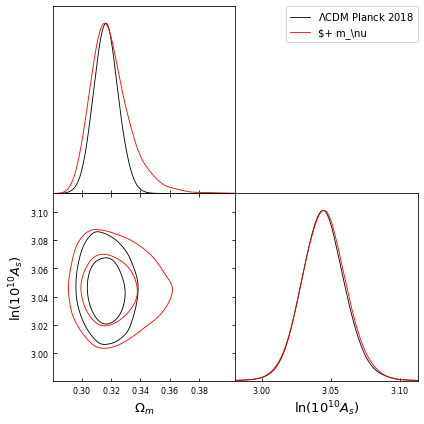

In [4]:
g = plots.getSubplotPlotter(width_inch=6)
g.settings.axes_fontsize = 9
g.settings.legend_fontsize = 11
g.triangle_plot([planck2018['samples'],planck2018_mnu['samples']],
                ['omegam','logA',],legend_labels=[r'$\Lambda$CDM Planck 2018',r'$+ m_\nu'])

### Read $\nu\Lambda$CDM from Planck 2018 + BAO

((0.2860120088655863, 0.33815129113441367), (0.0, 0.2547356199571935))

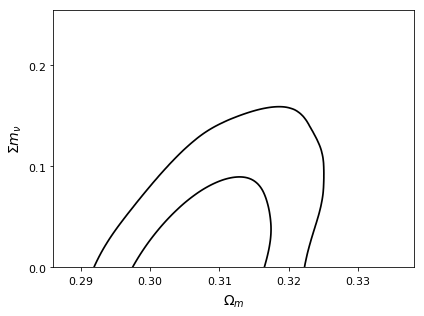

In [5]:
planck2018_mnu_BAO=planck_chains.get_planck_2018(model='base_mnu',data='plikHM_TTTEEE_lowl_lowE_BAO',
                                                root_dir=root_dir,linP_tag=None)
g = plots.getSinglePlotter()
g.plot_2d(planck2018_mnu_BAO['samples'], ['omegam', 'mnu'])

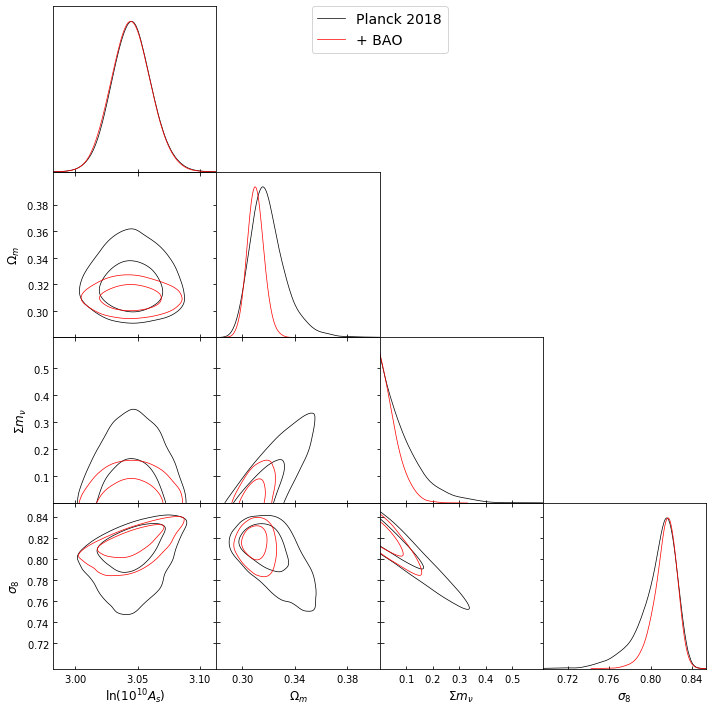

In [6]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['logA','omegam','mnu','sigma8'],legend_labels=['Planck 2018','+ BAO'])

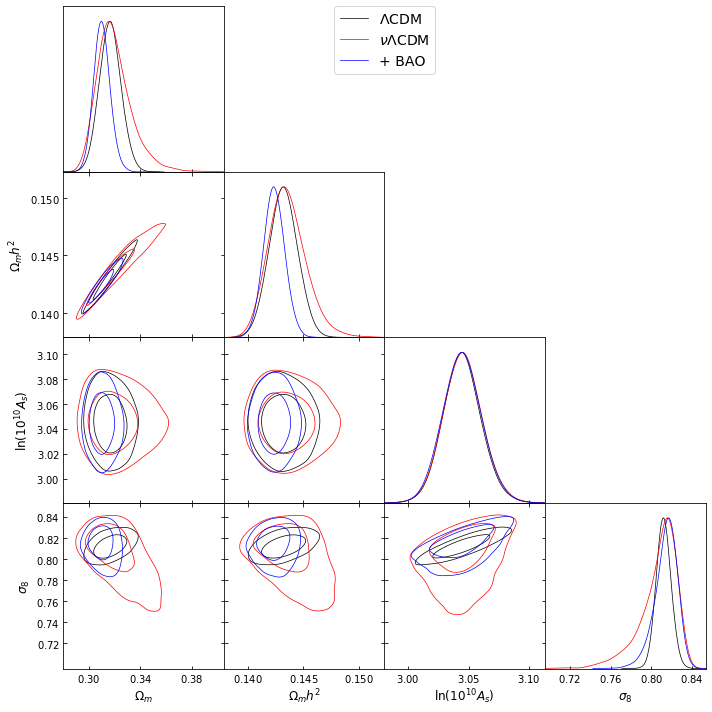

In [7]:
g = plots.getSubplotPlotter(width_inch=10)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 16
g.triangle_plot([planck2018['samples'],planck2018_mnu['samples'],planck2018_mnu_BAO['samples']],
                ['omegam','omegamh2','logA','sigma8'],
                legend_labels=[r'$\Lambda$CDM',r'$\nu\Lambda$CDM',r'+ BAO'])